In [19]:
from datasets import load_from_disk

# 데이터셋 로드
dataset = load_from_disk("datasets/ladlm_function_based_dataset")

# 데이터셋의 전체 정보 출력
print(dataset)

# 데이터셋의 컬럼(피처) 확인
print(dataset.column_names)

# 각 컬럼의 데이터 타입 확인
print(dataset.features)



Dataset({
    features: ['audio', 'file_name', 'spectrogram_with_axes', 'spectrogram_no_axes', 'function_based_explanation_spectrogram', 'complexity_level', 'shape_count', 'pattern_count', 'duration'],
    num_rows: 100
})
['audio', 'file_name', 'spectrogram_with_axes', 'spectrogram_no_axes', 'function_based_explanation_spectrogram', 'complexity_level', 'shape_count', 'pattern_count', 'duration']
{'audio': Audio(sampling_rate=16000, mono=True, decode=True, id=None), 'file_name': Value(dtype='string', id=None), 'spectrogram_with_axes': Image(mode=None, decode=True, id=None), 'spectrogram_no_axes': Image(mode=None, decode=True, id=None), 'function_based_explanation_spectrogram': Value(dtype='string', id=None), 'complexity_level': Value(dtype='int32', id=None), 'shape_count': Value(dtype='int32', id=None), 'pattern_count': Value(dtype='int32', id=None), 'duration': Value(dtype='float32', id=None)}


In [20]:
# 첫 번째 샘플 출력
print(dataset[0])


{'audio': {'path': 'automated_audio_level_3_000000053.wav', 'array': array([ 0.99996948, -1.        , -1.        , ...,  0.99996948,
       -1.        , -1.        ]), 'sampling_rate': 16000}, 'file_name': 'automated_audio_level_3_000000053.wav', 'spectrogram_with_axes': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1200x600 at 0x7F37527D9290>, 'spectrogram_no_axes': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1186x586 at 0x7F3752A8E090>, 'function_based_explanation_spectrogram': '{"spectrogram_base":{"sample_rate":16000,"n_fft":256,"hop_length":256,"noise_strength":10.099,"noise_type":"uniform","noise_params":{"low":-1.0,"high":1.0,"seed":556741133}},"shapes":[{"type":"fog","parameters":{"strength_dB":28.138,"coverage":0.201}},{"type":"hill","parameters":{"freq_center":2588.605,"time_center":4.547,"freq_width":1659.059,"time_width":9.436,"strength_dB":34.293}},{"type":"circle","parameters":{"center_freq":3248.444,"center_time":8.152,"radius_freq":749.427,"radius_time

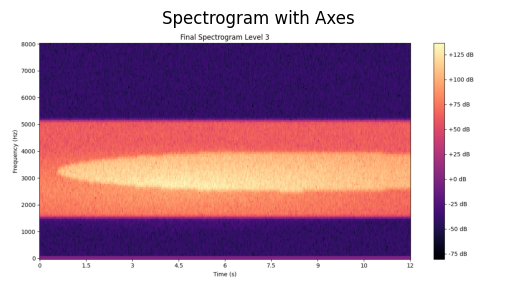

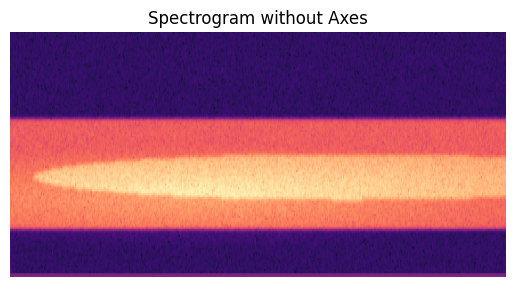

In [21]:
def display_image(image_feature, title="Spectrogram"):
    """
    Hugging Face Image feature를 PIL 이미지로 변환하여 표시합니다.
    
    Parameters:
    - image_feature: datasets.Image 객체
    - title: 이미지 타이틀
    """
    # image_feature는 이미 PIL.Image 객체이므로 바로 사용 가능
    plt.imshow(image_feature)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 첫 번째 샘플의 spectrogram_with_axes 이미지 표시
sample = dataset[0]
display_image(sample['spectrogram_with_axes'], title="Spectrogram with Axes")

# 첫 번째 샘플의 spectrogram_no_axes 이미지 표시
display_image(sample['spectrogram_no_axes'], title="Spectrogram without Axes")


In [22]:
from IPython.display import Audio

def play_audio(audio_feature):
    """
    Hugging Face Audio feature를 재생합니다.
    
    Parameters:
    - audio_feature: datasets.Audio 객체
    
    Returns:
    - IPython.display.Audio 객체
    """
    return Audio(audio_feature['array'], rate=audio_feature['sampling_rate'])

# 예시: 첫 번째 샘플의 오디오 재생
sample = dataset[0]
audio_widget = play_audio(sample['audio'])
audio_widget  # Jupyter Notebook 환경에서 실행 시 재생 가능


In [23]:
# 'complexity_level' 필드 값 확인
print(f"Complexity Level: {dataset[0]['complexity_level']}")

# 'function_based_explanation_spectrogram' 필드 확인 (JSON 문자열)
import json

explanation_str = dataset[0]['function_based_explanation_spectrogram']
explanation = json.loads(explanation_str)
print("Function Based Explanation Spectrogram:", explanation)


Complexity Level: 3
Function Based Explanation Spectrogram: {'spectrogram_base': {'sample_rate': 16000, 'n_fft': 256, 'hop_length': 256, 'noise_strength': 10.099, 'noise_type': 'uniform', 'noise_params': {'low': -1.0, 'high': 1.0, 'seed': 556741133}}, 'shapes': [{'type': 'fog', 'parameters': {'strength_dB': 28.138, 'coverage': 0.201}}, {'type': 'hill', 'parameters': {'freq_center': 2588.605, 'time_center': 4.547, 'freq_width': 1659.059, 'time_width': 9.436, 'strength_dB': 34.293}}, {'type': 'circle', 'parameters': {'center_freq': 3248.444, 'center_time': 8.152, 'radius_freq': 749.427, 'radius_time': 7.588, 'strength_dB': 35.443}}], 'patterns': [{'type': 'linear', 'parameters': {'shape_name': 'horizontal_range_dist_db', 'shape_params': {'strength_dB': 23.334, 'freq_min': 3389.404, 'freq_max': 3389.604, 'distribution': 'gaussian', 'distribution_params': {'sigma': 1095.42}}, 'direction': 'freq', 'repeat': 3, 'spacing': 1.0}}, {'type': 'n_linear_repeat_t_sleep', 'parameters': {'shape_name'

In [24]:
import pandas as pd

# 데이터셋을 Pandas DataFrame으로 변환
df = dataset.to_pandas()

# 기본 통계 정보 확인
print(df.describe())

# 각 클래스의 분포 확인 (예: complexity_level)
print(df['complexity_level'].value_counts())


       complexity_level  shape_count  pattern_count  duration
count        100.000000   100.000000     100.000000     100.0
mean           3.000000     2.780000       2.000000      12.0
std            1.421338     1.275884       1.421338       0.0
min            1.000000     1.000000       0.000000      12.0
25%            2.000000     2.000000       1.000000      12.0
50%            3.000000     3.000000       2.000000      12.0
75%            4.000000     4.000000       3.000000      12.0
max            5.000000     5.000000       4.000000      12.0
complexity_level
3    20
5    20
1    20
2    20
4    20
Name: count, dtype: int64


In [25]:
# 누락된 값 확인
print(df.isnull().sum())

# 오디오 파일의 길이 확인 (예: duration 필드와 실제 오디오 길이 비교)
for i in range(5):
    audio_length = len(dataset[i]['audio']['array']) / dataset[i]['audio']['sampling_rate']
    duration = dataset[i]['duration']
    print(f"Sample {i}: Calculated Duration = {audio_length:.2f}s, Recorded Duration = {duration}s")


audio                                     0
file_name                                 0
spectrogram_with_axes                     0
spectrogram_no_axes                       0
function_based_explanation_spectrogram    0
complexity_level                          0
shape_count                               0
pattern_count                             0
duration                                  0
dtype: int64
Sample 0: Calculated Duration = 12.00s, Recorded Duration = 12.0s
Sample 1: Calculated Duration = 12.00s, Recorded Duration = 12.0s
Sample 2: Calculated Duration = 12.00s, Recorded Duration = 12.0s
Sample 3: Calculated Duration = 12.00s, Recorded Duration = 12.0s
Sample 4: Calculated Duration = 12.00s, Recorded Duration = 12.0s


In [2]:
import json

def parse_function_based_explanation(sample):
    """
    function_based_explanation_spectrogram 필드를 JSON 문자열에서 Python 딕셔너리로 변환합니다.
    
    Parameters:
    - sample (dict): 데이터셋 샘플
    
    Returns:
    - dict: 파싱된 function_based_explanation_spectrogram 데이터
    """
    explanation_str = sample['function_based_explanation_spectrogram']
    explanation_dict = json.loads(explanation_str)
    return explanation_dict

# 첫 번째 샘플 처리
sample = dataset[0]
parsed_explanation = parse_function_based_explanation(sample)

parsed_explanation


NameError: name 'dataset' is not defined

In [ ]:
import os
import json
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

from noise_pipeline import (
    SpectrogramModifier,
    NoisePipeline,
    ShapeFactory,
    PatternFactory,
    reconstruct_audio_from_final_spectrogram
)


def reconstruct_pipeline_spectrogram_and_audio(parsed_explanation):
    """
    Reconstruct the spectrogram and audio based on parsed shapes and patterns.
    """
    spectrogram_base = parsed_explanation['spectrogram_base']
    shapes = parsed_explanation['shapes']
    patterns = parsed_explanation['patterns']

    sample_rate = spectrogram_base['sample_rate']
    n_fft = spectrogram_base['n_fft']
    hop_length = spectrogram_base['hop_length']
    noise_strength = spectrogram_base['noise_strength']
    noise_type = spectrogram_base['noise_type']
    noise_params = spectrogram_base['noise_params']

    # Initialize SpectrogramModifier
    spectro_mod = SpectrogramModifier(
        sample_rate=sample_rate,
        n_fft=n_fft,
        hop_length=hop_length,
        noise_strength=noise_strength,
        noise_type=noise_type,
        noise_params=noise_params
    )

    # Initialize NoisePipeline
    pipeline = NoisePipeline(
        spectro_mod=spectro_mod,
        apply_blur=False,
        blur_sigma=1.0
    )

    # Add shapes and patterns
    shape_factory = ShapeFactory()
    pattern_factory = PatternFactory()

    for shape_info in shapes:
        shape_name = shape_info['type']
        shape_params = shape_info['parameters']
        shape_obj = shape_factory.create(shape_name.lower(), **shape_params)
        pipeline.add_shape(shape_obj)

    for pattern_info in patterns:
        pattern_name = pattern_info['type']
        pattern_params = pattern_info['parameters']
        pattern_obj = pattern_factory.create(pattern_name.lower(), pattern_params)
        pipeline.add_pattern(pattern_obj)

    # Generate spectrogram and reconstruct audio
    duration = parsed_explanation.get('duration', 12.0)  # Default to 12.0 seconds
    signal_length = int(sample_rate * duration)
    silence_signal = np.zeros(signal_length)

    pipeline.generate(silence_signal)
    S_db = spectro_mod.S_db.copy()
    reconstructed_audio = reconstruct_audio_from_final_spectrogram(spectro_mod)

    return S_db, reconstructed_audio, sample_rate


def save_and_visualize_results(S_db, audio, sr, output_dir, file_id):
    """
    Save and visualize spectrogram and audio.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Save spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, hop_length=256, x_axis='time', y_axis='linear', cmap='magma')
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram: {file_id}")
    spectrogram_path = os.path.join(output_dir, f"{file_id}_spectrogram.png")
    plt.savefig(spectrogram_path, dpi=100)
    plt.close()

    # Save audio
    audio_path = os.path.join(output_dir, f"{file_id}.wav")
    sf.write(audio_path, audio, sr)

    print(f"Spectrogram saved at: {spectrogram_path}")
    print(f"Audio saved at: {audio_path}")


# 결과 저장 디렉토리
output_dir = "resconstructed_output"
file_id = "sample_spectrogram"

# Reconstruct spectrogram and audio
S_db, reconstructed_audio, sample_rate = reconstruct_pipeline_spectrogram_and_audio(parsed_explanation)

# Save and visualize results
save_and_visualize_results(S_db, reconstructed_audio, sample_rate, output_dir, file_id)


Spectrogram saved at: output_results/sample_spectrogram_spectrogram.png
Audio saved at: output_results/sample_spectrogram.wav


In [ ]:
json_example = """{"spectrogram_base":{"sample_rate":16000,"n_fft":256,"hop_length":256,"noise_strength":7.245,"noise_type":"normal","noise_params":{"mean":-40.0,"std":1.0,"seed":106493859}},"shapes":[{"type":"vertical_spike","parameters":{"center_freq":5507.253,"center_time":1.044,"radius_freq":2.509,"radius_time":0.053,"strength_dB":29.475}}],"patterns":[]}"""
explanation_dict = json.loads(json_example)

In [7]:
explanation_dict

{'spectrogram_base': {'sample_rate': 16000,
  'n_fft': 256,
  'hop_length': 256,
  'noise_strength': 7.245,
  'noise_type': 'normal',
  'noise_params': {'mean': 0.0, 'std': 1.0, 'seed': 106493859}},
 'shapes': [{'type': 'vertical_spike',
   'parameters': {'center_freq': 5507.253,
    'center_time': 1.044,
    'radius_freq': 2.509,
    'radius_time': 0.053,
    'strength_dB': 29.475}}],
 'patterns': []}

In [10]:
import os
import json
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

from noise_pipeline import (
    SpectrogramModifier,
    NoisePipeline,
    ShapeFactory,
    PatternFactory,
    reconstruct_audio_from_final_spectrogram
)


def reconstruct_pipeline_spectrogram_and_audio(parsed_explanation):
    """
    Reconstruct the spectrogram and audio based on parsed shapes and patterns.
    """
    spectrogram_base = parsed_explanation['spectrogram_base']
    shapes = parsed_explanation['shapes']
    patterns = parsed_explanation['patterns']

    sample_rate = spectrogram_base['sample_rate']
    n_fft = spectrogram_base['n_fft']
    hop_length = spectrogram_base['hop_length']
    noise_strength = spectrogram_base['noise_strength']
    noise_type = spectrogram_base['noise_type']
    noise_params = spectrogram_base['noise_params']

    # Initialize SpectrogramModifier
    spectro_mod = SpectrogramModifier(
        sample_rate=sample_rate,
        n_fft=n_fft,
        hop_length=hop_length,
        noise_strength=noise_strength,
        noise_type=noise_type,
        noise_params=noise_params
    )

    # Initialize NoisePipeline
    pipeline = NoisePipeline(
        spectro_mod=spectro_mod,
        apply_blur=False,
        blur_sigma=1.0
    )

    # Add shapes and patterns
    shape_factory = ShapeFactory()
    pattern_factory = PatternFactory()

    for shape_info in shapes:
        shape_name = shape_info['type']
        shape_params = shape_info['parameters']
        shape_obj = shape_factory.create(shape_name.lower(), **shape_params)
        pipeline.add_shape(shape_obj)

    for pattern_info in patterns:
        pattern_name = pattern_info['type']
        pattern_params = pattern_info['parameters']
        pattern_obj = pattern_factory.create(pattern_name.lower(), pattern_params)
        pipeline.add_pattern(pattern_obj)

    # Generate spectrogram and reconstruct audio
    duration = parsed_explanation.get('duration', 12.0)  # Default to 12.0 seconds
    signal_length = int(sample_rate * duration)
    silence_signal = np.zeros(signal_length)

    pipeline.generate(silence_signal)
    S_db = spectro_mod.S_db.copy()
    reconstructed_audio = reconstruct_audio_from_final_spectrogram(spectro_mod)

    return S_db, reconstructed_audio, sample_rate


def save_and_visualize_results(S_db, audio, sr, output_dir, file_id):
    """
    Save and visualize spectrogram and audio.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Save spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, hop_length=256, x_axis='time', y_axis='linear', cmap='magma')
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram: {file_id}")
    spectrogram_path = os.path.join(output_dir, f"{file_id}_spectrogram.png")
    plt.savefig(spectrogram_path, dpi=100)
    plt.close()

    # Save audio
    audio_path = os.path.join(output_dir, f"{file_id}.wav")
    sf.write(audio_path, audio, sr)

    print(f"Spectrogram saved at: {spectrogram_path}")
    print(f"Audio saved at: {audio_path}")

# 결과 저장 디렉토리
output_dir = "resconstructed_output"
file_id = "sample_spectrogram"

json_example = """{"spectrogram_base":{"sample_rate":16000,"n_fft":256,"hop_length":256,"noise_strength":7.245,"noise_type":"normal","noise_params":{"mean":-40.0,"std":1.0,"seed":106493859}},"shapes":[{"type":"vertical_spike","parameters":{"center_freq":5507.253,"center_time":1.044,"radius_freq":2.509,"radius_time":0.053,"strength_dB":29.475}}],"patterns":[]}"""
explanation_dict = json.loads(json_example)

# Reconstruct spectrogram and audio
S_db, reconstructed_audio, sample_rate = reconstruct_pipeline_spectrogram_and_audio(explanation_dict)

# Save and visualize results
save_and_visualize_results(S_db, reconstructed_audio, sample_rate, output_dir, file_id)

Spectrogram saved at: resconstructed_output/sample_spectrogram_spectrogram.png
Audio saved at: resconstructed_output/sample_spectrogram.wav
